# Homework 8 Phase Portraits and Cycles





# Phase portrait analysis of a chemostat

Question from H.T. Banks and Marie Davidian

A chemostat is a bioreactor where a microbial culture is continuously supplied with nutrients at a fixed rate and concomitantly harvested to keep the culture at a constant concentration. Chemostats are also used as microcosms in ecology and evolutionary biology as well as in wastewater treatment. 

Here, we consider the problem of growth of micro-organisms, for example, a population of bacteria requiring an energy source containing carbon for growth (say a simple sugar). Suppose we have some bacteria in a container, and we add nutrients continuously in this container (i.e., a continuous culture medium). Assume the bacteria's growth depends on a limiting nutrient
alone (i.e., all other nutrients are in excess and other conditions necessary for their growth are adequate). The container has an outlet so that nutrients and bacteria in the container can flow out. We further assume the container is well mixed.

Let:
- V be the volume of the chemost stat and equal to 1$L$.
- Q be the fixed volumetric flow rate and equal to 1 $L/h$.
- q = Q/V be the dilution rate ($h^{-1}$)
- N(t) be the mass of bacteria at time t. 
- c(t) be the concentration of nutrients ($g/L$) and $c_0$ be the concentration of nutrients in the feed line, equal to 8 g/L.
- r be the growth rate of bacteria ($h^{-1}$) where $r(c) = \frac{R_{max}c(t)}{(K_m+c(t))}$. Let $K_m = 4$ and $R_{max}=2$. 
- y is the yield parameter equal to 0.25 $unitless$.

\begin{align}
\dot{N} = rN(t)-qN(t)\\
\dot{c} = qc_0-qc(t)-y^{-1}rN(t)\\
\end{align}

.

1. Is this system linear or nonlinear? Defend your answer below. **Use a text cell.**

The system is nonlinear because the diff eqs are dependent on non first order variables/ have terms that are dependent on two variables. The first equation is nonlinear where $\dot{N}= aN(t)$ where $a=(r-q)$ with r depending on values of $c(t)$ as well  and the second equation is nonlinear where $\dot{c}=C+dc(t)+eN(t)$ where C is constant $qc0$ $d=-q$ and $e=-y^-1(Rmaxc(t)/Km+c(t))$. e is a non constant that is dependent on c(t) so the term eN(t) is dependent on both c(t) and N(t)


In [ ]:
# !pip install plotdf

2. Perform a phase plane analysis of this system. Be sure to carefully consider the bounds of your axes. If you use the program plotdf from class, be sure to read the help file. Be sure to add example trajectories to your plot that start at (x_0,y_0) = (1,1),(3,9) and (0.1,0.1).

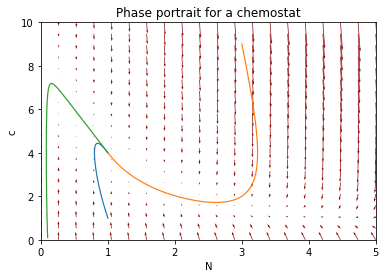

In [32]:
#performing phase portrait analysis for a chemostat 
from plotdf import plotdf 
import numpy as np 
import matplotlib.pyplot as plt

def f(x): #defining the function f for the chemostat accepting an array x  
    Rm=2 #defines the parameters for the equations 
    Km=4
    q=1
    y=0.25
    r=(Rm*x[1])/(Km+x[1])
    return np.array([r*x[0]-q*x[0],q*8-q*x[1]-(r*x[0])/y]) #returns the diff eqs 


plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,5]), # [xmin,xmax]
     np.array([0,10]),# [ymin,ymax]
     [(1,1),(3,9),(0.1,0.1)], # list of initial values for trajectories 
       tdir='forward', #only shows the forward time direction 
     gridsteps=20,
     nsteps = 1000,
      tmax=20)

plt.xlabel("N")
plt.ylabel("c")
plt.title("Phase portrait for a chemostat");

3. In words with a text cell, describe all important aspects of your phase portrait. How many steadystates exists? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of nutrients? Under what starting conditions do we expect our chemostat to overshoot the steadystate concentration of bacteria? 

There is one discernible steady state at around c=4 and N=1. at starting conditions above or below 4 and below a nutrient start of 1, the steadystate concentration of nutrients would be overshot and at starting conditions below 1, the steadystate concentration of bacteria would be overshot. 

4. As a hint for the part above, two steadystates exist. Perform an eigenvalue and eigenvector analysis on both. Add a point to your phase portrait indicating if the steadystate is stable (closed point) or unstable (open point). And add arrows indicating the directions of the corresponding eigenvectors. Make the length of the arrows correspond to the size of the eigenvalue.

Note that for an unstable node, the arrows should point away. For a stable node or direction, the arrows should point towards the node.

[0. 8.]
[1. 4.]
[1. 4.]
[1. 4.]
eignevalues at steadystate 1,4 are: (array([-1.9375+1.80169191j, -1.9375-1.80169191j]), array([[ 0.87705802+0.j        ,  0.87705802-0.j        ],
       [-0.36178643+0.31603767j, -0.36178643-0.31603767j]]))
eignevalues at steadystate 0,0 are: (array([-2.66666667+1.97202659j, -2.66666667-1.97202659j]), array([[ 0.95742711+0.j        ,  0.95742711-0.j        ],
       [-0.23210354+0.17164288j, -0.23210354-0.17164288j]]))


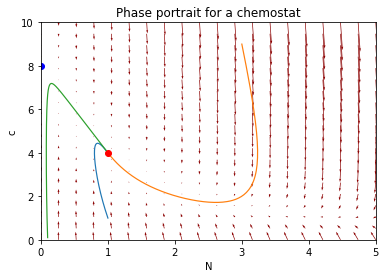

In [43]:
import scipy.optimize
root_val = np.matrix([[0, 0],[1, 1], [1, 4],[2,5]]) #finding the roots for the system by inserting the steadystate (1,4) and points around it 
root_val[0,]
for m in np.arange(0,4,1):
    result = scipy.optimize.root(f, root_val[m,])
    print(result.x)
    
#linearization around the steady states gives:

# (1,4) and (0,8)
#f= r*N-q*N
#N*Km*Rm/(c+Km)^2=df/dc
#Rm*c/Km+c - q=df/dN

# g= q*c0-q*c-(r*N)/y
#-N*Rm/y*(c+Km)+N*Rm*c/y*(c+Km)^2-q =dg/dc
#-Rm*c/(c+Km)*y = dg/dN

Rm=2 #defines the parameters for the equations 
Km=4
q=1
y=0.25

#solves the partial derivatives at the steady state to construct the jacobian matrix 
a11= (1*Km*Rm)/(4+Km)**2
a12= Rm*4/Km+4 - q 
a21= -1*Rm/(y*(4+Km))+((1*Rm*4)/(y*(4+Km)**2))-q
a22= (-Rm*4)/((4+Km)*y)

b11= (0*Km*Rm)/(8+Km)**2
b12= Rm*8/Km+8 - q 
b21= -0*Rm/(y*(8+Km))+((0*Rm*8)/(y*(8+Km)**2))-q
b22= (-Rm*8)/((8+Km)*y)

# To get the eigenvalues and vectors:
from numpy import linalg as LA
a = np.array([[a11, a12], [a21, a22]]) #constructs the jacobian matrix from the partial derivatives above at(1,4)
val=LA.eig(a)
print("eignevalues at steadystate 1,4 are:",val)

from numpy import linalg as LA
b = np.array([[b11, b12], [b21, b22]]) #constructs the jacobian matrix from the partial derivatives above at(1,4)
val=LA.eig(b)
print("eignevalues at steadystate 0,0 are:",val)

#since both steadystates have negative real components then they are both stable

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,5]), # [xmin,xmax]
     np.array([0,10]),# [ymin,ymax]
     [(1,1),(3,9),(0.1,0.1)], # list of initial values for trajectories 
       tdir='forward', #only shows the forward time direction 
     gridsteps=20,
     nsteps = 1000,
      tmax=20)

plt.xlabel("N")
plt.ylabel("c")
plt.title("Phase portrait for a chemostat");
plt.plot(1,4,'ro') #adds a point to the phase portrait at the stable steady state 
plt.plot(0,8,'bo')

# Cycles in Glycolysis

Glycolysis is how cells breakdown sugars to produce energy and the concentrations of many proteins and molecules involved in this process have been shown to wax and wane over periods of time. Sel'kov proposed a simple model of glycolysis:
\begin{align}
\dot{x} = -x+ay+x^2y\\
\dot{y} = b - ay - x^2y\\
\end{align}
where x and y are nondimensionalized forms of ADP, F6P (a phosphate) and a,b > 0 are kinetic parameters. Let's explore the system dynamics for two scenarios.

1. Let a = .15 and b = 1.2. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

In [ ]:
def f(x,a=1,b=1): #defining the function f for an array x and two parameters a and b 
    return np.array([-x[0]+a*x[1]+x[0]**2*x[1],b-a*x[1]-x[0]**2*x[1]]) # returns an array for the solutions for the two 
#equations 

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,3]), # [xmin,xmax]
     np.array([0,3]),# [ymin,ymax]
     [(1,1),(2,2)], # list of initial values for trajectories 
#      # Additional parameters for `f` 
     parameters={"a":0.15,"b":1.2},
     tdir='forward', #only shows the forward time direction 
     gridsteps=10,
     nsteps = 1000,
      tmax=10)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase portrait for glycolysis model for a=0.15 and b=1.2");


2. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

The system is seemingly oscillatory perhaps decaying oscillation since it spirals into a point. There seems to be a steady state at the point x~1.25 and y~0.75. 

3. Let a = 0.04 and b = 0.6. Construct a phase portrait of the system and be sure to include trajectories for (x_0,y_0) = (1,1) and (2,2).

In [ ]:
def f(x,a=1,b=1): #defining the function f for an array x and two parameters a and b 
    return np.array([-x[0]+a*x[1]+x[0]**2*x[1],b-a*x[1]-x[0]**2*x[1]])

plotdf(f, # Function giving the rhs of the diff. eq. system
     np.array([0,5]), # [xmin,xmax]
     np.array([0,5]),# [ymin,ymax]
     [(1,1),(2,2)], # list of initial values for trajectories 
#      # Additional parameters for `f` 
     parameters={"a":0.04,"b":0.6},
     gridsteps=20,
     tdir='forward', #only shows the forward time direction 
     nsteps = 1000,
      tmax=20)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase portrait for glycolysis model for a=0.04 and b=0.6");

4. In the *text cell* below, describe the system dynamics you observed based on the phase portrait.

The system is still seemingly oscillatory where at one point the oscillation is decaying because it spirals inward but at some point the system gets purely oscillatory forming a limit cycle. 

5. We have seen that steadystates with complex eigenvalues with negative real parts are oscillatory and stable. How does the dynamics of a system near a steadystate with negative real-part, complex eigenvalues differ from a limit cycle? Explain in a text cell below.

with a negative real part and complex part for the eigenvalues the system spirals towrd a point and not in a cycle whereas in a limit cycle the system begins to spiral into a closed loop and just continues to loop instead of spiralling toward a point. 